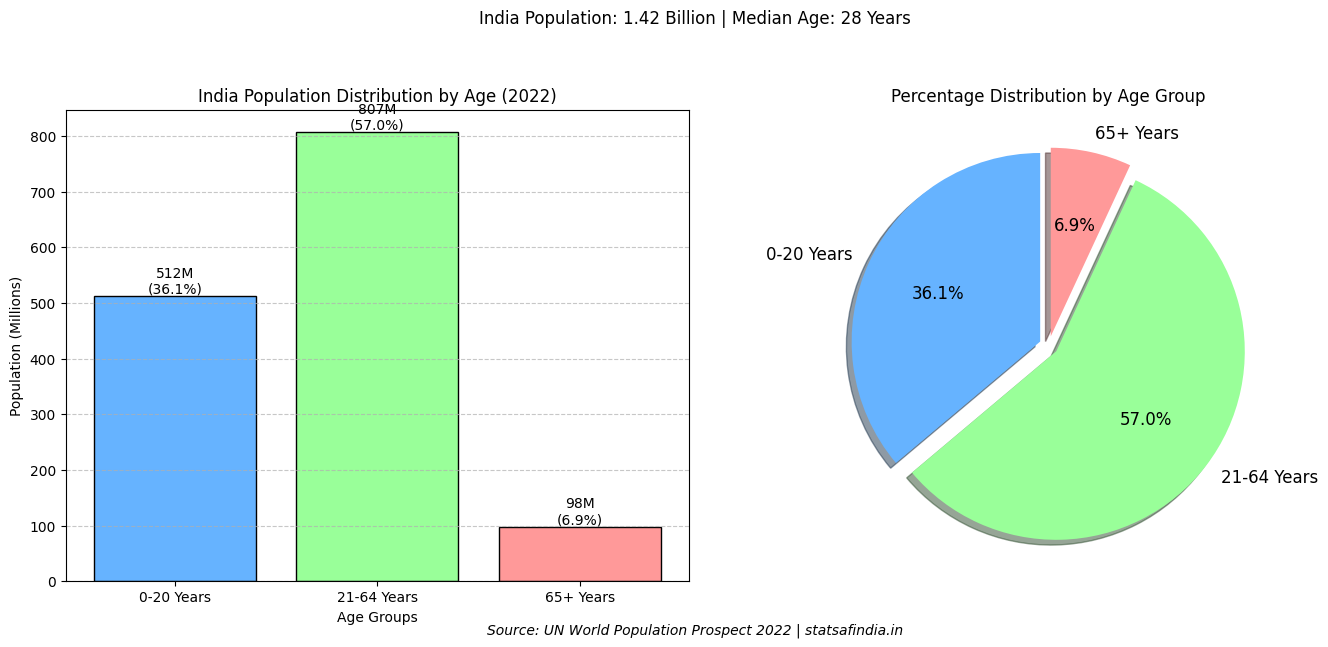

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the sample dataset
age_groups = ['0-20 Years', '21-64 Years', '65+ Years']
population = [512, 807, 98]  # in millions
percentages = [36.1, 57.0, 6.9]
colors = ['#66b3ff', '#99ff99', '#ff9999']

# Create figure with two subplots
plt.figure(figsize=(14, 6))

# Bar Chart (1st subplot)
plt.subplot(1, 2, 1)
bars = plt.bar(age_groups, population, color=colors, edgecolor='black')

# Add values on top of bars
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}M\n({percent}%)',
             ha='center', va='bottom')

plt.title('India Population Distribution by Age (2022)')
plt.xlabel('Age Groups')
plt.ylabel('Population (Millions)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Pie Chart (2nd subplot)
plt.subplot(1, 2, 2)
explode = (0.05, 0.05, 0.05)  # slight separation between slices
plt.pie(population, labels=age_groups, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode,
        shadow=True, textprops={'fontsize': 12})
plt.title('Percentage Distribution by Age Group')

# Add source and additional info
plt.suptitle('India Population: 1.42 Billion | Median Age: 28 Years', y=1.05, fontsize=12)
plt.figtext(0.5, 0.01, 'Source: UN World Population Prospect 2022 | statsafindia.in', 
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import plotly.express as px

def load_data(file_path):
    """Load and clean the population data"""
    df = pd.read_excel(file_path, sheet_name='Data', header=3)
    df = df.rename(columns={'Country Name': 'Country'})
    
    # Drop metadata columns
    cols_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code'] + \
                  [col for col in df.columns if 'Unnamed' in str(col)]
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
    
    return df

def visualize_all_countries(df, year=2000):
    """Create interactive visualization for all countries"""
    # Prepare data
    df_vis = df[['Country', str(year)]].rename(columns={str(year): 'Population'})
    df_vis = df_vis.sort_values('Population', ascending=False)
    
    # Create interactive plot
    fig = px.bar(df_vis,
                 x='Population',
                 y='Country',
                 orientation='h',
                 title=f'Population of All Countries ({year})',
                 labels={'Population': 'Population', 'Country': ''},
                 hover_data={'Population': ':,.0f'},
                 height=4000)  # Adjust height based on number of countries
    
    # Formatting
    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        xaxis_tickformat=',.0f',
        hoverlabel=dict(bgcolor="white", font_size=12),
        margin=dict(l=150, r=50, b=100, t=100)
    )
    
    fig.show()

# Main execution
if __name__ == "__main__":
    file_path = r"C:\Users\SHAIKH\Downloads\API_SP.POP.TOTL_DS2_en_excel_v2_385898.xls"
    df = load_data(file_path)
    
    if df is not None:
        visualize_all_countries(df, year=2023)  # Change year as needed

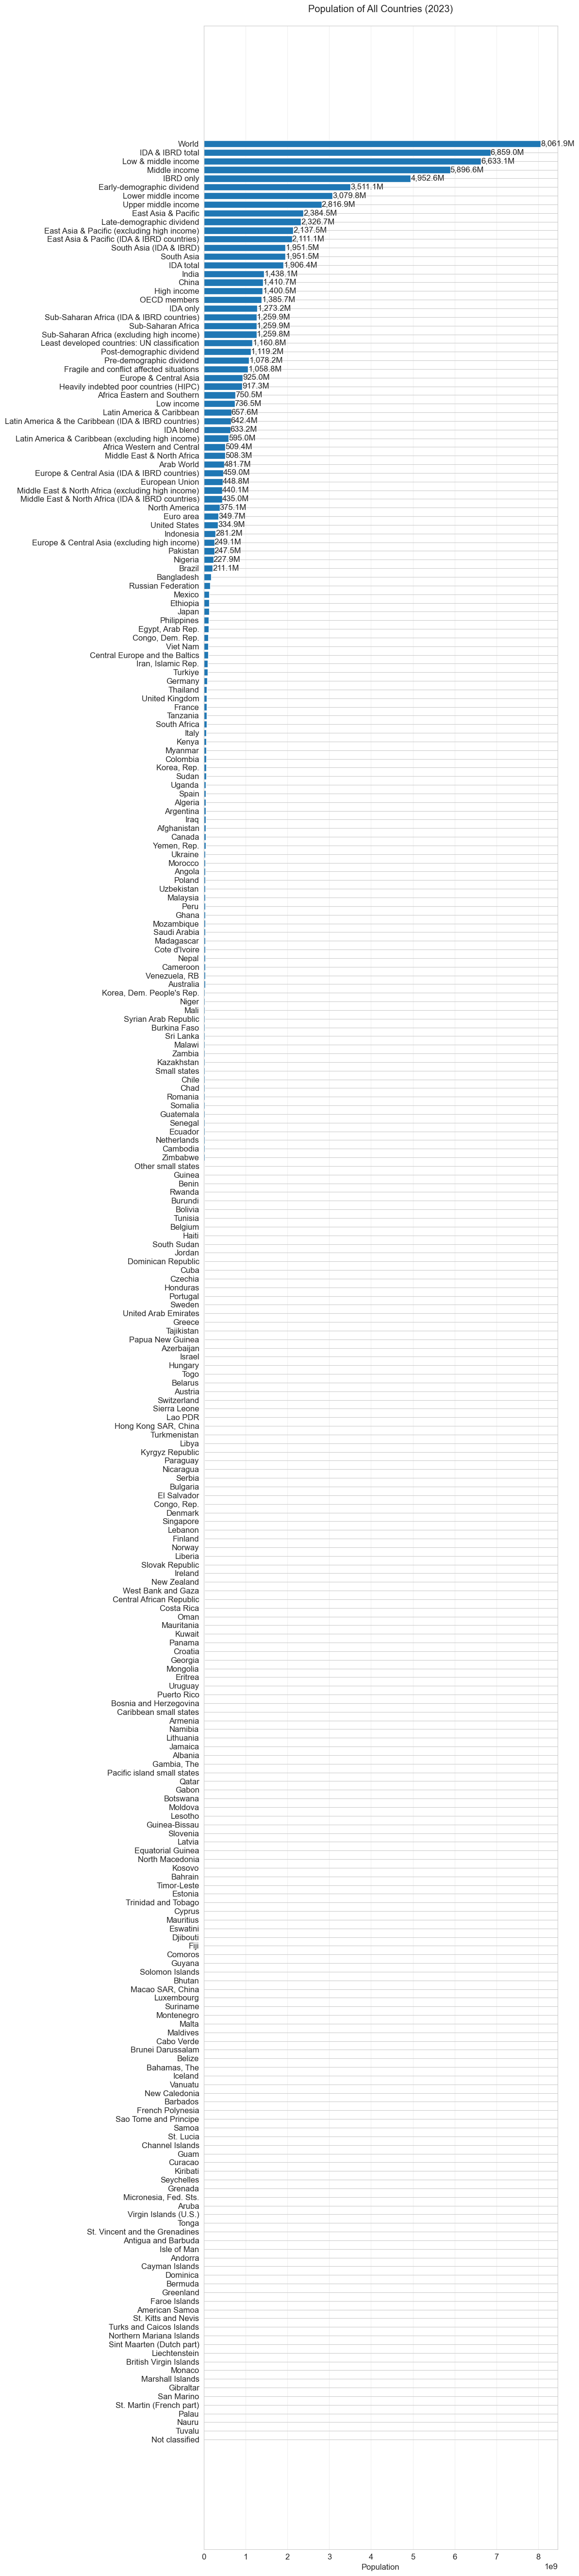

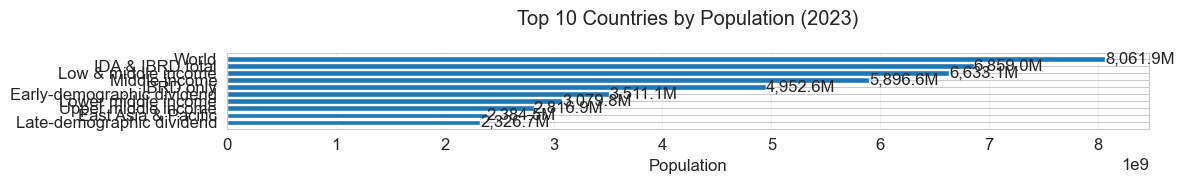

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_all_countries_static(df, year=2000, top_n=None):
    """Static visualization for all countries"""
    df_vis = df[['Country', str(year)]].rename(columns={str(year): 'Population'})
    df_vis = df_vis.sort_values('Population', ascending=False)
    
    if top_n:
        df_vis = df_vis.head(top_n)
        title = f'Top {top_n} Countries by Population ({year})'
    else:
        title = f'Population of All Countries ({year})'
    
    plt.figure(figsize=(12, len(df_vis)*0.2))  # Dynamic height
    bars = plt.barh(df_vis['Country'], df_vis['Population'])
    
    # Formatting
    plt.title(title, pad=20)
    plt.xlabel('Population')
    plt.gca().invert_yaxis()  # Largest at top
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels for top countries
    for i, bar in enumerate(bars[:50]):  # Label first 50 to avoid clutter
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{width/1e6:,.1f}M',
                va='center', ha='left')
    
    plt.tight_layout()
    plt.show()

# Usage
visualize_all_countries_static(df, year=2023)  # All countries
visualize_all_countries_static(df, year=2023, top_n=10)  # Top 50 only

Using data from 2023 instead


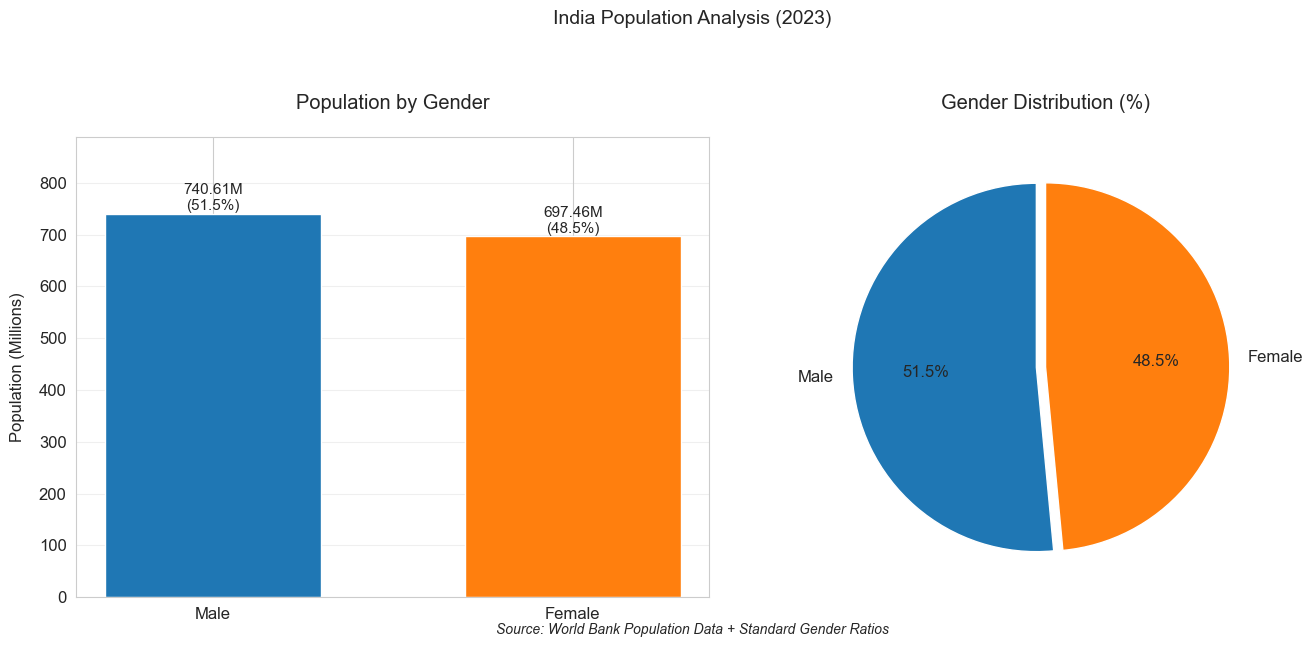

Successfully visualized India's population:
Total: 1438.07 million
Male: 740.61 million (51.5%)
Female: 697.46 million (48.5%)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = r"C:\Users\SHAIKH\Downloads\API_SP.POP.TOTL_DS2_en_excel_v2_385898.xls"
df = pd.read_excel(file_path, sheet_name='Data', header=3)
df = df.rename(columns={'Country Name': 'Country'})

# Get latest year (2024 based on your output)
latest_year = 2024

# Find India's row - handling different possible country names
india_names = ['India', 'IND', 'Republic of India']
india_row = df[df['Country'].isin(india_names)]

if india_row.empty:
    print("Error: Could not find India in the dataset. Available countries:")
    print(df['Country'].unique())
else:
    # Get India's population
    india_total = india_row[str(latest_year)].values[0]
    
    if pd.isna(india_total):
        print(f"Warning: No population data for India in {latest_year}")
        # Try previous year if current year is missing
        for year in range(latest_year-1, 1960, -1):
            india_total = india_row[str(year)].values[0]
            if not pd.isna(india_total):
                latest_year = year
                print(f"Using data from {latest_year} instead")
                break
    
    if pd.isna(india_total):
        raise ValueError("Could not find valid population data for India")
    
    india_total = india_total / 1e6  # Convert to millions

    # Gender distribution estimates (using standard ratios)
    male_percent = 51.5
    female_percent = 48.5
    male_pop = india_total * male_percent / 100
    female_pop = india_total * female_percent / 100

    # Create visualization
    plt.figure(figsize=(14, 6))
    plt.suptitle(f'India Population Analysis ({latest_year})', y=1.05, fontsize=14)

    # Bar Chart
    plt.subplot(1, 2, 1)
    bars = plt.bar(['Male', 'Female'], [male_pop, female_pop], 
                  color=['#1f77b4', '#ff7f0e'], width=0.6)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                 f'{height:.2f}M\n({height/india_total*100:.1f}%)',
                 ha='center', va='bottom', fontsize=11)
    
    plt.title('Population by Gender', pad=20)
    plt.ylabel('Population (Millions)', labelpad=10)
    plt.ylim(0, max(male_pop, female_pop)*1.2)
    plt.grid(axis='y', alpha=0.3)

    # Pie Chart
    plt.subplot(1, 2, 2)
    wedges, texts, autotexts = plt.pie(
        [male_percent, female_percent],
        labels=['Male', 'Female'],
        colors=['#1f77b4', '#ff7f0e'],
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.05, 0),
        textprops={'fontsize': 12}
    )
    plt.title('Gender Distribution (%)', pad=20)
    
    # Add source
    plt.figtext(0.5, 0.01, 
               'Source: World Bank Population Data + Standard Gender Ratios', 
               ha='center', fontsize=10, style='italic')
    
    plt.tight_layout()
    plt.show()

    print(f"Successfully visualized India's population:")
    print(f"Total: {india_total:.2f} million")
    print(f"Male: {male_pop:.2f} million ({male_percent}%)")
    print(f"Female: {female_pop:.2f} million ({female_percent}%)")